# Working with Bar Data

In [18]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
import pandas as pd

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%run getstock-mine.py

matplotlib.rcParams['figure.figsize'] = (14, 6)

## Let's get some data

First let's take a look at [getstock.py](getstock.py)...

In [11]:
# now let's get some data
bars = getMinuteStockPrices('AAPL')
bars.head()

,open,high,low,close,volume
timestamp,,,,,
2019-03-22 09:31:00,195.3200,195.68,194.795,195.6319,1285541
2019-03-22 09:32:00,195.6550,196.00,195.655,195.9238,292811
2019-03-22 09:33:00,195.9167,196.48,195.880,196.4240,398042
2019-03-22 09:34:00,196.4200,196.86,196.410,196.7900,424859
2019-03-22 09:35:00,196.8000,197.12,196.650,197.1200,362358


In [13]:
bars.tail()

,open,high,low,close,volume
timestamp,,,,,
2019-03-28 15:56:00,188.680,188.75,188.550,188.59,122743
2019-03-28 15:57:00,188.595,188.62,188.470,188.50,74156
2019-03-28 15:58:00,188.485,188.59,188.485,188.55,77038
2019-03-28 15:59:00,188.570,188.58,188.500,188.52,79213
2019-03-28 16:00:00,188.530,188.71,188.500,188.68,284924


In [14]:
# filter on one day of data
day = bars['2019-03-22']

In [15]:
day.head()

,open,high,low,close,volume
timestamp,,,,,
2019-03-22 09:31:00,195.3200,195.68,194.795,195.6319,1285541
2019-03-22 09:32:00,195.6550,196.00,195.655,195.9238,292811
2019-03-22 09:33:00,195.9167,196.48,195.880,196.4240,398042
2019-03-22 09:34:00,196.4200,196.86,196.410,196.7900,424859
2019-03-22 09:35:00,196.8000,197.12,196.650,197.1200,362358


Let's plot the close of each bin:

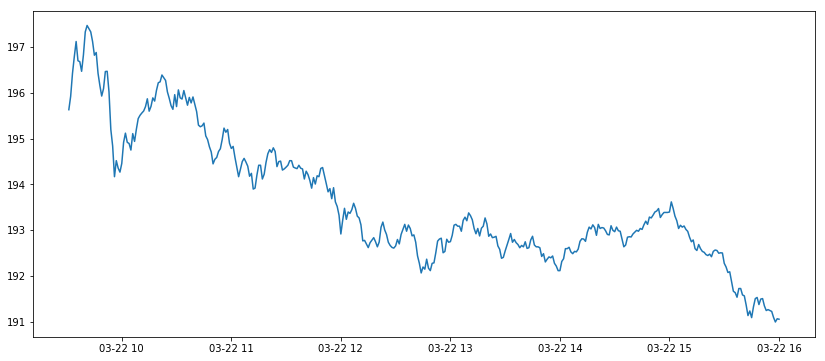

In [20]:
#plot a single series
plt.plot( day[ 'close' ] )

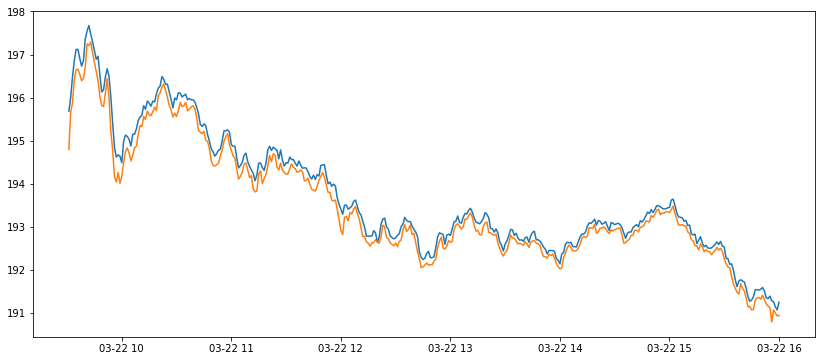

In [21]:
# or multiple
plt.plot( day[ ['high', 'low' ] ] )

### A little formatting

Text(0, 0.5, 'Price')

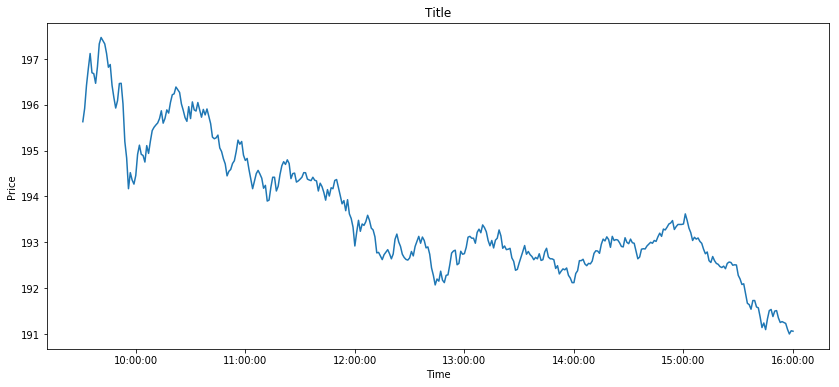

In [22]:
# maybe with some labels 
xaxis = pd.Series(day.index.values)
ax = plt.gca()
xfmt = md.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
plt.plot( xaxis, day[ 'close' ] )
plt.title( 'Title' )
plt.xlabel( 'Time' )
plt.ylabel( 'Price' )

### Volume chart

Text(0.5, 1.0, 'One day volume chart')

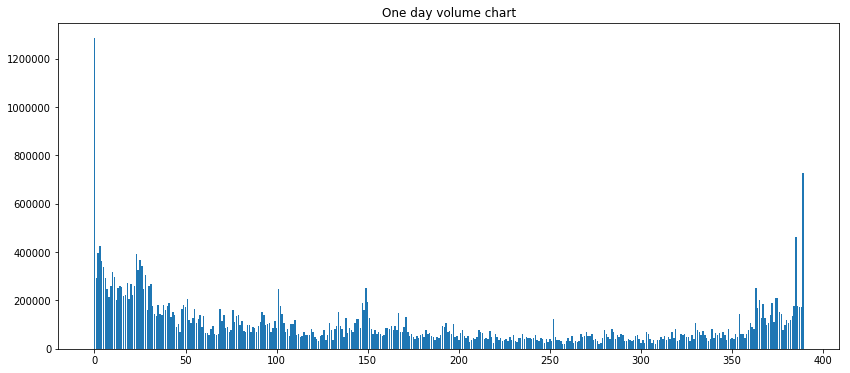

In [31]:
xes = np.arange(len(day['volume']))
plt.bar(xes, day['volume'])
plt.title("One day volume chart")

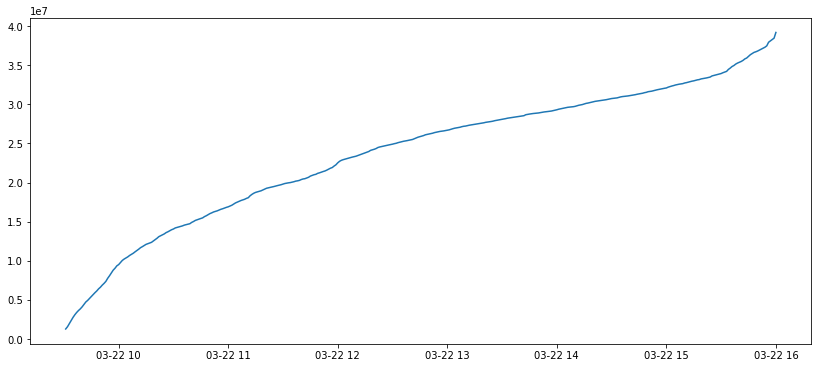

In [32]:
# we also want cumulative volume... 
cum_vol = day[ 'volume'].cumsum()
plt.plot(cum_vol)

In [33]:
# get open, high, low, close (simple max of each - except min is min!)
day_open = day[ 'open' ].iloc[0]
day_close = day[ 'close' ].iloc[ day['close'].size - 1]
day_high = day[ 'high' ].max()
day_low = day[ 'low' ].min()
day_open
day_close

191.06

In [34]:
# calculate VWAP
vwap = (day[ 'close' ] * day[ 'volume' ]).sum() / day[ 'volume' ].sum()
vwap

194.1132590491003

(<matplotlib.collections.LineCollection at 0x11df93710>,
 <matplotlib.collections.PolyCollection at 0x11e3d59b0>)

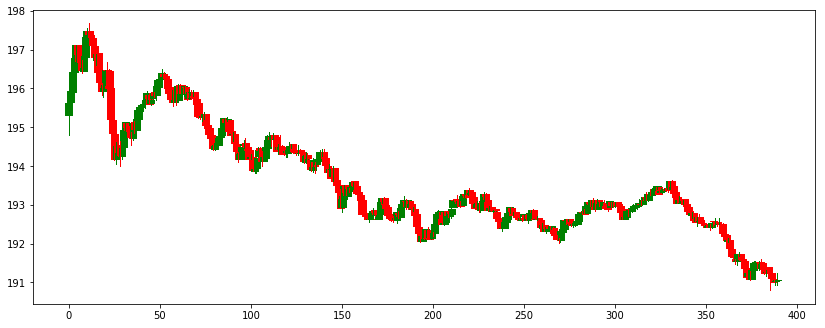

In [36]:
# Candlestick chart
import mpl_finance as mf

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
mf.candlestick2_ohlc(ax, day['open'], day['high'], day['low'], day['close'], 
                     width=4, colorup='g', colordown='r', alpha=1.0)
